# Tutte le funzioni

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from colorama import Fore

In [2]:
'''
Funzione: dato un array di punti mi ritorna l'array dei massimi e dei minimi contenuti al su interno
nel caso di gruppi di punti che formano il massimo o il minimo ritorna il punto centrale del gruppo (se i gruppi sono 
dispari prende il floor). Non considera primo e ultimo punto come possibili max o min'''

def find_all_minmax(SMA_a):

    minmax_array=np.array([['TYPE','VALUE','INDEX']])
    passed_min=False
    for i in range(1,(len(SMA_a)-1)):
        
        is_max = (SMA_a[i]>SMA_a[i-1] and SMA_a[i]>SMA_a[i+1])
        is_min = (SMA_a[i]<SMA_a[i-1] and SMA_a[i]<SMA_a[i+1])                                                                                    
        checkif_maxLarge = (SMA_a[i]>SMA_a[i-1] and SMA_a[i]==SMA_a[i+1])
        checkif_minLarge = (SMA_a[i]<SMA_a[i-1] and SMA_a[i]==SMA_a[i+1])
        
        if is_max and passed_min:                
            minmax_array=np.append(minmax_array, [['max', SMA_a[i],i]], axis=0)                
            passed_min=False
            
        elif is_min:
            passed_min=True
            minmax_array=np.append(minmax_array, [['min', SMA_a[i],i]], axis=0)
            
        elif checkif_maxLarge and passed_min:
            
            for r in range((i+1),len(SMA_a)-1):
                
                if SMA_a[r]<SMA_a[r+1]:               
                    break
                    
                elif SMA_a[r]>SMA_a[r+1]: 
                    i=(i + r)//2
                    minmax_array=np.append(minmax_array, [['L max', SMA_a[i],i]], axis=0)
                    passed_min=False
                    break
                    
        elif checkif_minLarge:
            passed_min=True
            for r in range((i+1),len(SMA_a)-1):
                
                if SMA_a[r]>SMA_a[r+1]:
                    break
                    
                elif SMA_a[r]<SMA_a[r+1]: 
                    i=(i + r)//2
                    minmax_array=np.append(minmax_array, [['L min', SMA_a[i],i]], axis=0)
                    break                                                                           
    
    if minmax_array[-1,0]=='min' or minmax_array[-1,0]=='L min':
        minmax_array=np.delete(minmax_array,[-1],axis=0) 
    
    return minmax_array    
    

In [3]:

# con argomento 'minmax_array' (generato dalla funzione di prima) ritorna la distanza media tra un min e un max successivo 
# DEVO MODIFICARE se cambia il formato dell'array di entrata
def distance_array(minmax_array):
    
    distance_array= np.array([])
    index_array = minmax_array[1: ,2]
    for i in range(0,(len(index_array) - 1)):
        d=int(index_array[i+1])-int(index_array[i])
        distance_array = np.append(distance_array, [d])
    
    if distance_array.size > 0:
        
        return distance_array
    else:
        return (Fore.RED + "      !!Sorry, no numbers to calculate MEAN and STD!! \n")

In [4]:

# calcola il guadagno di una ipotetica compra-vendita seguendo la average distance dei min/max della SMA
def calculate_gain_investment(minmax_array, stock_array, average_distance, capital_invested):
    
    average_buysell_array = np.empty((0,2))
    
    total_earn=0
    initial_capital = capital_invested       
    idx=int(minmax_array[1,2])-1    
    buy=True 
    
    while idx < (len(stock_array)-1):   
        if buy:
            average_buysell_array=np.append(average_buysell_array,np.array([['buy', float(idx)]]), axis=0)
            buy_price = stock_array[int(idx)]
            idx += average_distance
            buy=False
            
        else:
            average_buysell_array=np.append(average_buysell_array, np.array([['sell', float(idx)]]), axis=0)
            sell_price = stock_array[int(idx)]            
            factor = sell_price/buy_price
            earn = capital_invested*factor - capital_invested 
            total_earn+=earn
            capital_invested+= earn
            idx += average_distance
            buy=True
                   
    final_capital = capital_invested
    final_percentage = (total_earn/initial_capital)*100
    
    return    average_buysell_array, total_earn, final_capital, final_percentage
  


In [5]:
#crea la linea del grafico e le varie rette del grafico

def plot_with_lines(DOT_array ,SMA_array,SMA_minmax_index, SMA_minmax_values, n):
    
    x = np.arange(n-1,len(DOT_array))
    plt.plot(x, SMA_array, color='tab:orange', linewidth=1.3, label='SMA')
    
    
    
    y1 = np.full(len(SMA_minmax_index),np.min(DOT_array))-((np.max(DOT_array)-np.min(DOT_array))*0.04)
    plt.vlines((SMA_minmax_index+(n-1)), ymin=y1, ymax=SMA_minmax_values, color='dimgray', linestyle='--', linewidth=1)


In [6]:
#Funzione utile per creare punti ed aggiungere label ad ogni punto che vado a scrivere

def points_with_labels(x_array, y_array, labels, n):
    
    assert len(x_array) == len(y_array) == len(labels), 'len is not equal in all the arrays'
    for i, label in enumerate(labels): #get (0, label)
        x = x_array[i]
        y = y_array[i]
        
        plt.scatter(x+(n-1), y, marker='s', color='red')
                
        plt.annotate(label,
                xy=(x+(n-1), y), #mostra il punto 
                xytext=(4, -4), #mostra annotazione e la posiziona
                textcoords='offset points',
                ha='right',
                va='top',
                rotation=70)
        
   

In [7]:
def points_buysell_withlabel(buysell_array, height_for_arrows):
    
    for i in buysell_array:
        x = float(i[1])
        y = height_for_arrows
        
        
        if i[0]=='buy':
            plt.scatter(x, y, marker='^', color='green')
        else:
            plt.scatter(x, y, marker='v', color='red')
                

In [14]:
# funzione che dato un array di punti: stampa il grafico dei punti con sopra il grafico della SMA per ogni step = 'n'
# con relativi punti di massimo e minimo

def stat_finance(DOT_array, capital_invested, currency_symbol):
    
    #crea un errore se per caso il DOT_array contiene degli zeri o numeri negativi
    if np.any(DOT_array<=0):
        raise Exception(Fore.RED + "Price of stocks can't be ZERO or negative")
        
    n=2
    
    while n < len(DOT_array):
            
        # crea l'array della simple mooving avarage in relazione allo step 'n' di riferimento
        SMA = pd.Series(DOT_array).rolling(window=n).mean().iloc[n-1:].values
        
        #definisce e partiziona l'array dei minmax
        minmax_array = find_all_minmax(SMA)
        
        if len(minmax_array)>1:
            
            minmax_labels = minmax_array[1:,0]
            minmax_values = minmax_array[1:,1].astype('float64')
            minmax_index = minmax_array[1:,2].astype('float64')
            minmax_array

            #crea un po di dati utili da ritornare a fine funzione
            average_buysell_array, total_earn, final_capital, final_percentage = calculate_gain_investment(minmax_array, DOT_array, np.mean(distance_array(minmax_array)), capital_invested)

            # prepara un po' di costanti per poter eseguire il grafico per qualsiasi tipo di array
            lowest_point=np.min(DOT_array)
            highest_point=np.max(DOT_array)
            height_graph=highest_point-lowest_point

            
            #GRAFICI
            
            plt.figure(figsize=(17,10))

            #stampa il grafico iniziale della stock (con linee che lo delimitano) 
            x = np.arange(len(DOT_array))
            plt.plot(x, DOT_array, color='cornflowerblue', label = 'POINTs')

            plt.axvline(len(DOT_array)-1, color='black',linewidth=1)
            plt.axvline(0, color='black',linewidth=1)
            plt.axhline(lowest_point-(height_graph*0.01), color='black',linewidth=1)

            #stampa il grafico della SMA più le linee verticali in corrispondenza dei massimi e dei minimi
            plot_with_lines(DOT_array, SMA, minmax_index, minmax_values, n)

            #stampa i pallini con le etichette
            height_for_dots = np.full(len(minmax_index),lowest_point)-(height_graph*0.04)
            points_with_labels(minmax_index, height_for_dots, minmax_labels, n)

            #stampa i punti fi buy e sell 
            height_for_arrows = lowest_point-(height_graph*0.16)
            points_buysell_withlabel(average_buysell_array, height_for_arrows)

            plt.ylim(lowest_point-(height_graph*0.25),highest_point*1.01)
            plt.title(f"SMA with step {int(n)}", size=25)
            plt.xlabel('time', size=19)
            plt.ylabel('euro', size=19)
            plt.legend(loc=9)
            plt.show()

            n=n*2

            # stampa i numeri: medie varie STD e gli altri valori utili
            print(f"      average = {np.mean(distance_array(minmax_array))},  STD = {np.std(distance_array(minmax_array))}\n")
            print(f'''      GUADAGNO PREVISTO :   
          guadagno netto = {round(total_earn, 2)}{currency_symbol} | capitale finale = {round(final_capital, 2)}{currency_symbol} | guadagno percentuale = {round(final_percentage, 2)}%\n\n''')
        
        else:
            print (f"{Fore.RED}    \n\n\n\n     !!Sorry, no min and max detected for SMA with step {n} or greater!! \n")
            break


In [15]:
# grafico sen() più noise
'''x = np.arange(0,4*np.pi,0.1)
y = np.sin(x)
noise = np.random.uniform(-0.5,0.5,len(y))
y=y+noise+20'''

# array generato random
'''array_random=np.random.randint(450,550,50)
print(array_random)
'''
# array reali:
'''tesla = np.load('teslaASK.npy')'''

apple_array = pd.read_csv('STATIC/dati_stocks/AAPL.csv')
apple_clean = apple_array['Adj Close']

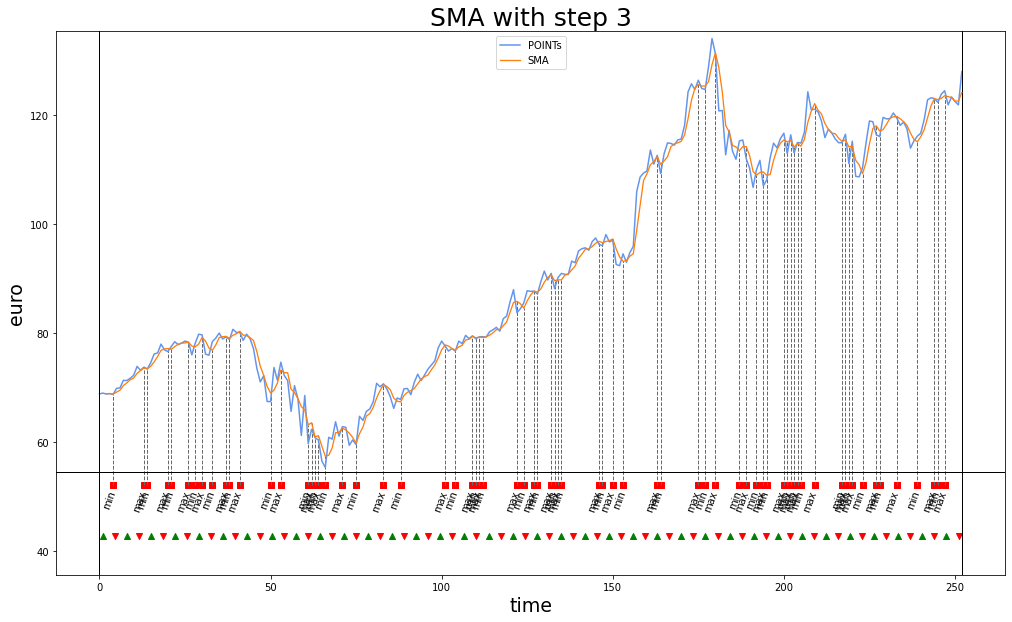

      average = 3.5217391304347827,  STD = 3.0293668714917974

      GUADAGNO PREVISTO :   
          guadagno netto = 342.31$ | capitale finale = 842.31$ | guadagno percentuale = 68.46%




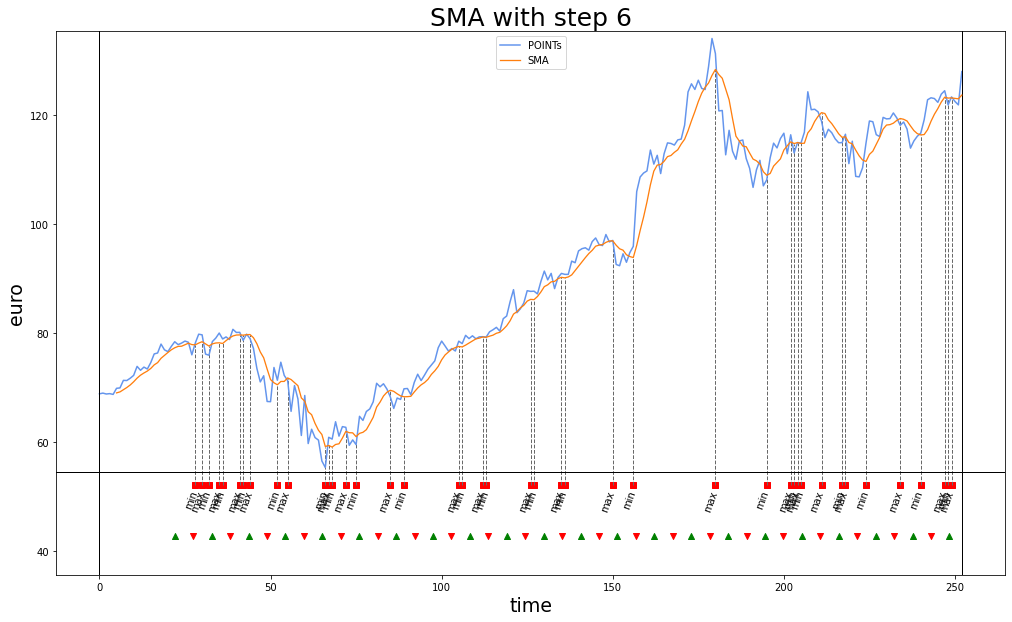

      average = 5.390243902439025,  STD = 5.18853355277929

      GUADAGNO PREVISTO :   
          guadagno netto = 266.09$ | capitale finale = 766.09$ | guadagno percentuale = 53.22%




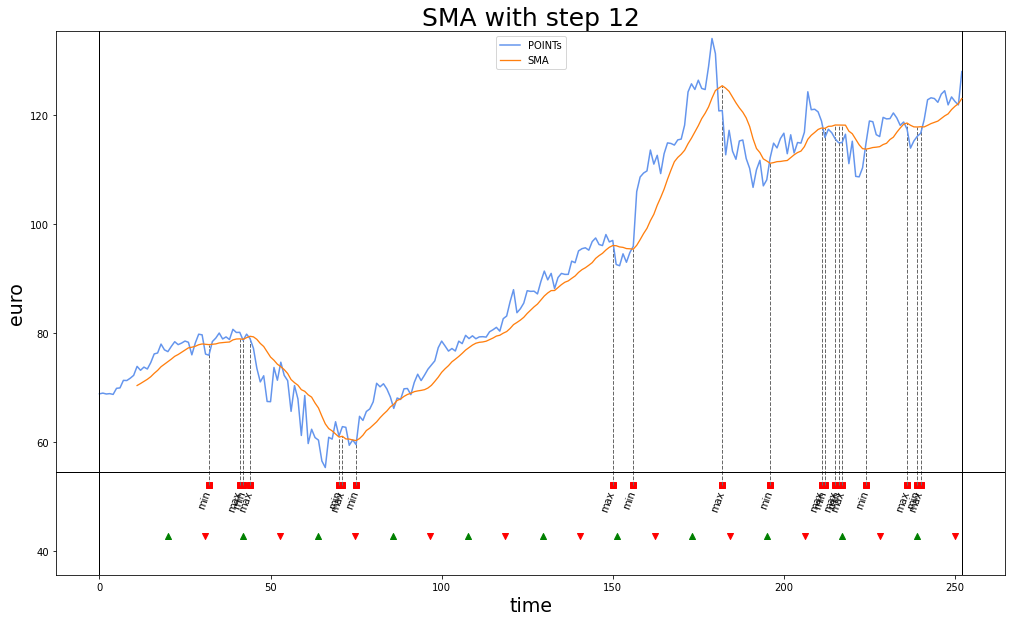

      average = 10.947368421052632,  STD = 16.975132537147967

      GUADAGNO PREVISTO :   
          guadagno netto = 213.78$ | capitale finale = 713.78$ | guadagno percentuale = 42.76%




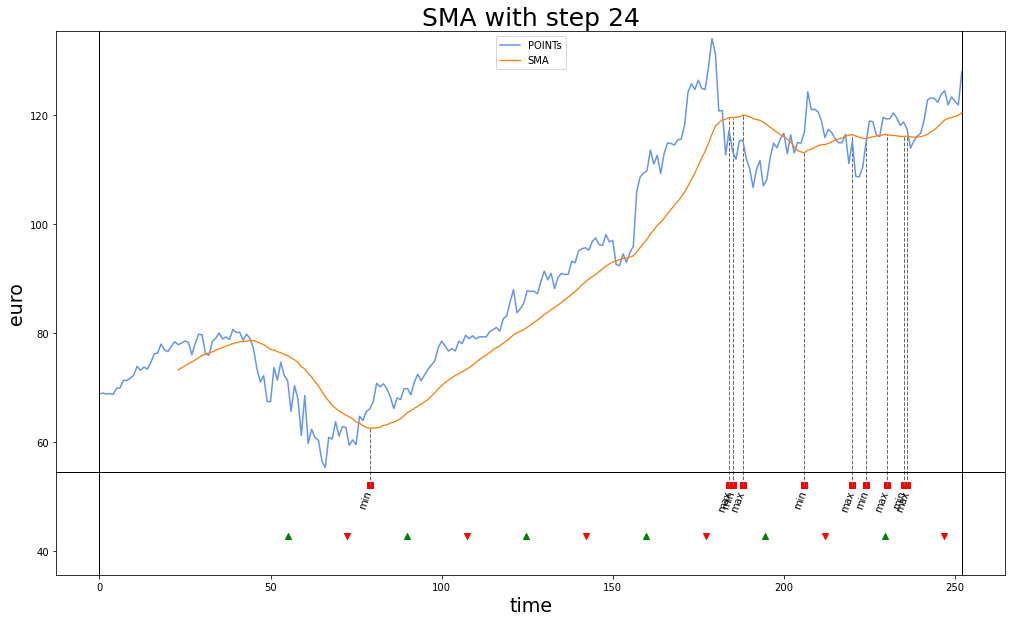

      average = 17.444444444444443,  STD = 31.436394729361812

      GUADAGNO PREVISTO :   
          guadagno netto = 217.47$ | capitale finale = 717.47$ | guadagno percentuale = 43.49%




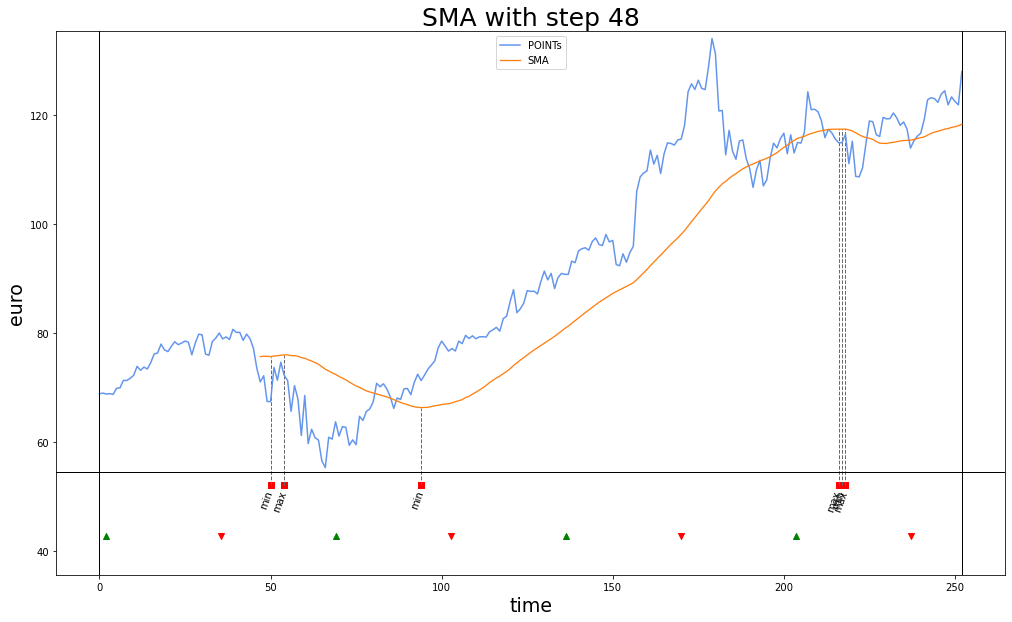

      average = 33.6,  STD = 46.59871242856395

      GUADAGNO PREVISTO :   
          guadagno netto = 397.74$ | capitale finale = 897.74$ | guadagno percentuale = 79.55%


    



     !!Sorry, no min and max detected for SMA with step 96 or greater!! 



In [13]:
stat_finance(apple_clean, 500, '$')